In [8]:
import pyaudio
from collections import deque
import io
import soundfile as sf
from pydub import AudioSegment
import sounddevice as sd
from scipy.io.wavfile import read, write
import io

from common_audio import *
from audio_dataset import *

import itertools

FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 # Sample Rate
CHUNK = 1024 # Block Size
RECORD_SECONDS = 2 # Record time
WAVE_OUTPUT_FILENAME = "voice.wav"

# simply modify the value for the 'rate' parameter to change the playback speed
# <1 === slow down;  >1 === speed up
FRAMERATE_OFFSET = 1

audio = pyaudio.PyAudio()

#output stream
stream_out = audio.open(format=FORMAT,
                        channels=CHANNELS,
                        rate= int(RATE * FRAMERATE_OFFSET),
                        output=True)

# open input steam to start recording mic audio
stream_in = audio.open(format=FORMAT, 
                       channels=CHANNELS,
                       rate=RATE, 
                       input=True)

test_set_size=1

X_test_tone = generate_tone(RATE-(RATE%CHUNK), RECORD_SECONDS, np.linspace(250, 3500, test_set_size), 0.05*np.ones(test_set_size))
new_tone=X_test_tone[0]



# modify the chunk multiplier below to captyre longer time durations

counter = 0
frames = deque(int(RATE / CHUNK * RECORD_SECONDS)*[0], int(RATE / CHUNK * RECORD_SECONDS))


bytes_aud = deque(int(RATE / CHUNK * RECORD_SECONDS)*[0], int(RATE / CHUNK * RECORD_SECONDS))




print("record")
try:
    while 1: 
        data = stream_in.read(CHUNK)

        
        frames.append(np.fromstring(data, dtype=np.int16))
        bytes_aud.append(data)
        if counter is int(RATE / CHUNK * RECORD_SECONDS):
            #stream_out.write(bytes_aud[int(RATE / CHUNK *(RECORD_SECONDS-1))])  #This line uncommented give you live audio
            new_frames=np.array(list(itertools.chain.from_iterable(frames)))
            new_frames2=new_frames+10000*new_tone
            
            
            spectrogram = librosa.stft(y=new_frames2, n_fft=256, hop_length=64)
            #After spectrogram, we can input it into model
            
            #input below
            ######
            
            
            
            
            
            
            ######
            new_bframes = [new_frames2[x:x+CHUNK] for x in range(0, len(new_frames2), CHUNK)]
            new_data = np.array(new_bframes,dtype=np.int16)
            
            
            stream_out.write(new_data[int(RATE / CHUNK *(RECORD_SECONDS-1))].tostring())  #this line gives you tone audio

        else:
            counter+=1
            
    
except KeyboardInterrupt:
    print("interrupt")

'''
print("play")
while i in range(len(frames)):
    data = stream_in.read(CHUNK)
    stream_out.write(frames[i])
    
print("play done")'''

stream_out.stop_stream()
stream_out.close()
audio.terminate()

record


<ipython-input-8-bad0f448718c>:64: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  frames.append(np.fromstring(data, dtype=np.int16))


interrupt


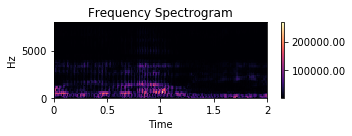

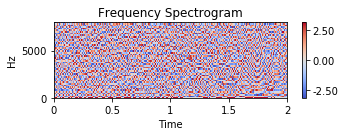

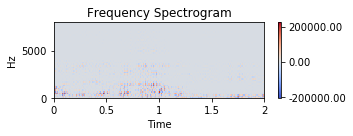

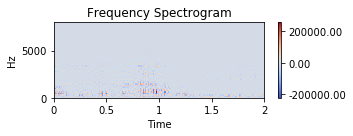

In [9]:
import common_audio
from importlib import reload
reload(common_audio)

##I ADDED A Y-AXIS LIMIT OF 8000 on my frequency charts to visualize it better

spectrogram = librosa.stft(y=new_frames2, n_fft=256, hop_length=64)
common_audio.show_complete_spectrogram(spectrogram,44032)